<a href="https://colab.research.google.com/github/NeerajGithubIITM/Autoencoder/blob/main/Autoencoder_project_Recolouring_celebA_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files
#drive.flush_and_unmount()
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Activation, Dense, Dropout, Flatten, BatchNormalization,Reshape, Input, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import  array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input



from skimage.color import rgb2lab, lab2rgb, rgb2gray

import numpy as np
import zipfile
import os
import random
import matplotlib.pyplot as plt

In [ ]:
zip_path = "/content/drive/MyDrive/img_align_celeba.zip"
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dataset = os.listdir('/tmp/img_align_celeba')

In [ ]:
images = []
X = []
Y = []

for img in dataset[2048:4096]:
  # image = img_to_array(load_img('/tmp/img_align_celeba/' + img))
  # images.append(image)

  x = rgb2lab(1.0/255*img_to_array(load_img('/tmp/img_align_celeba/' + img)))[:,:,0]
  X.append(x)

  y = rgb2lab(1.0/255*img_to_array(load_img('/tmp/img_align_celeba/' + img)))[:,:,1:]
  Y.append(y)

In [ ]:
# for img in images:
#   x = rgb2lab(1.0/255*img)[:,:,0]
#   X.append(x)

In [ ]:
# for img in images:
#   y = rgb2lab(1.0/255*img)[:,:,1:]
#   Y.append(y)

In [ ]:
X_train = np.expand_dims(np.asarray(X), axis = -1)
Y_train = np.asarray(Y)

In [ ]:
# model = Sequential([
#     Input(shape = (218,178,1)),
#     Conv2D(8, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
#     Conv2D(8, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
#     Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
#     Conv2D(16, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
#     Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
#     Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
#     UpSampling2D(size=(2,2)),
#     Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
#     UpSampling2D(size=(2,2)),
#     Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'),
#     UpSampling2D(size=(2,2)),
#     Conv2D(2, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')
# ])

In [ ]:
# model.summary()

In [ ]:
# model.compile(optimizer = Adam(lr = 0.001), loss = 'mse')
# history = model.fit(X_train, Y_train, batch_size = 64, epochs = 25)

In [ ]:
# loss = history.history['loss']

# epochs = range(len(loss))

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.title('Training loss')
# plt.legend()

# plt.show()

In [ ]:
# model.save('model2.h5')

In [ ]:
VGG_model = VGG19(include_top = False, input_shape = (218, 178, 3))
# VGG_model.summary()

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
decoder_model = Sequential([Input(shape = (218,178,1)),
                            Conv2D(3, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')])

for layer in VGG_model.layers[1:15]: 
  decoder_model.add(layer)
for layer in decoder_model.layers:
  layer.trainable = False
decoder_model.layers[0].trainable = True

decoder_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 178, 3)       30        
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 54, 44, 128)       0

In [ ]:
encoder_model = decoder_model.output

encoder_model = ZeroPadding2D(1)(encoder_model)
encoder_model = Conv2D(512, kernel_size = (2,2), strides = (1,1), padding = 'valid', activation = 'relu')(encoder_model)
encoder_model = Conv2D(512, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)
encoder_model = BatchNormalization()(encoder_model)
encoder_model = Conv2D(512, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)


encoder_model = UpSampling2D(size=(2,2))(encoder_model)
encoder_model = Conv2D(256, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)
encoder_model = Conv2D(256, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)
encoder_model = BatchNormalization()(encoder_model)
encoder_model = Conv2D(256, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)


encoder_model = UpSampling2D(size=(2,2))(encoder_model)
encoder_model = Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)
encoder_model = BatchNormalization()(encoder_model)
encoder_model = Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(encoder_model)


encoder_model = UpSampling2D(size=(2,2))(encoder_model)
encoder_model = Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')(encoder_model)
encoder_model = BatchNormalization()(encoder_model)
encoder_model = Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')(encoder_model)


encoder_model = Conv2D(2, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')(encoder_model)


 
auto_encoder = Model(inputs = decoder_model.input, outputs = encoder_model)    
auto_encoder.summary()    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 218, 178, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 218, 178, 3)       30        
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584

In [ ]:
auto_encoder.compile(optimizer = Adam(lr = 0.001), loss = 'mse')
history2 = auto_encoder.fit(X_train, Y_train, batch_size = 128, epochs = 100)

Epoch 1/100


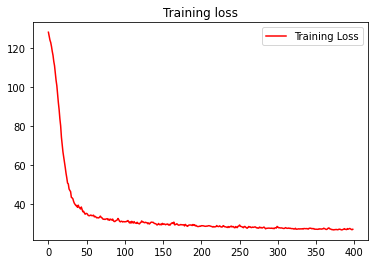

In [ ]:
loss = history2.history['loss']
loss.pop(0)

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
auto_encoder.save('auto_encoder4.h5')

In [ ]:
from google.colab import files
files.download('auto_encoder4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def upload_and_predict(model):

  uploaded=files.upload()

  n = len(uploaded)
  i = 1
  plt.figure(figsize=(15, 5*n))

  for fn in uploaded.keys():
 
    path='/content/' + fn
    img=load_img(path, target_size=(218, 178))
  
    x_star=img_to_array(img)
    x = rgb2lab(1.0/255*x_star)[:,:,0]

    x = np.expand_dims(x, axis=0)

    pred = model.predict(np.expand_dims(x, axis = -1))
    recon_image = np.concatenate((np.expand_dims(x, axis = -1), pred), axis = -1)

    plt.subplot(n, 3, i)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(n, 3, i+1)
    plt.imshow(x[0], cmap = 'gray')
    plt.title('Grayscaled Image')

    plt.subplot(n, 3, i+2)
    plt.imshow(lab2rgb(recon_image[0]))
    plt.title('Re-Coloured Image')

    i+=3